In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("epilepsy.data.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
df.shape

(195, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [11]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [126]:

for col in df.columns:
    value = df[col].value_counts()
    print(value)


MDVP:Fo(Hz)
119.992    1
122.400    1
145.174    1
138.145    1
166.888    1
          ..
148.090    1
142.729    1
136.358    1
120.080    1
214.289    1
Name: count, Length: 192, dtype: int64
MDVP:Fhi(Hz)
157.302    1
148.650    1
198.109    1
197.238    1
198.966    1
          ..
162.824    1
162.408    1
176.595    1
139.710    1
260.277    1
Name: count, Length: 192, dtype: int64
MDVP:Flo(Hz)
74.997     1
113.819    1
80.637     1
81.114     1
79.512     1
          ..
67.343     1
65.476     1
65.750     1
111.208    1
77.973     1
Name: count, Length: 192, dtype: int64
MDVP:Jitter(%)
0.00369    3
0.00694    3
0.00742    3
0.00784    2
0.00494    2
          ..
0.00762    1
0.00831    1
0.00971    1
0.00405    1
0.00567    1
Name: count, Length: 170, dtype: int64
MDVP:Jitter(Abs)
0.000030    45
0.000040    28
0.000020    28
0.000010    18
0.000050    17
0.000060    16
0.000080     9
0.000070     8
0.000090     5
0.000009     5
0.000100     3
0.000110     2
0.000150     2
0.00000

In [127]:
#From the above value_counts it is concluded there is no unwanted strings present in datas like "?, /"

In [70]:
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [19]:
for data in df.columns:
    df.dropna(inplace=True)

In [20]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [23]:
df = df.drop(["name"],axis =1)

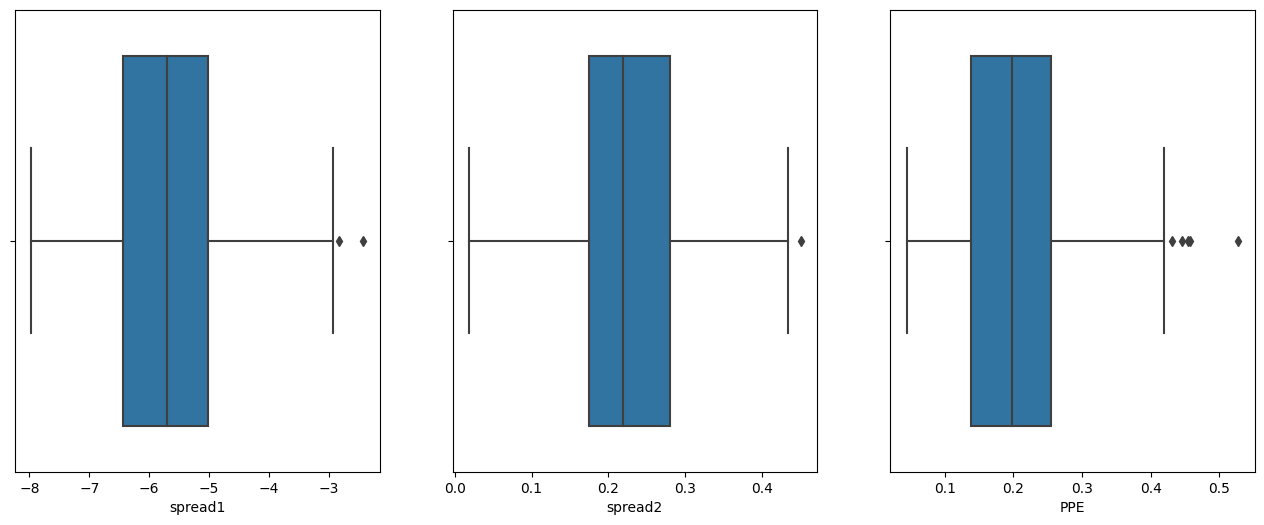

In [24]:
fig, ax = plt.subplots(1,3,figsize=(16, 6)) 
sns.boxplot(x= 'spread1', data=df, ax=ax[0]) 
sns.boxplot(x= 'spread2', data=df, ax=ax[1])
sns.boxplot(x='PPE', data=df, ax=ax[2])
plt.show()

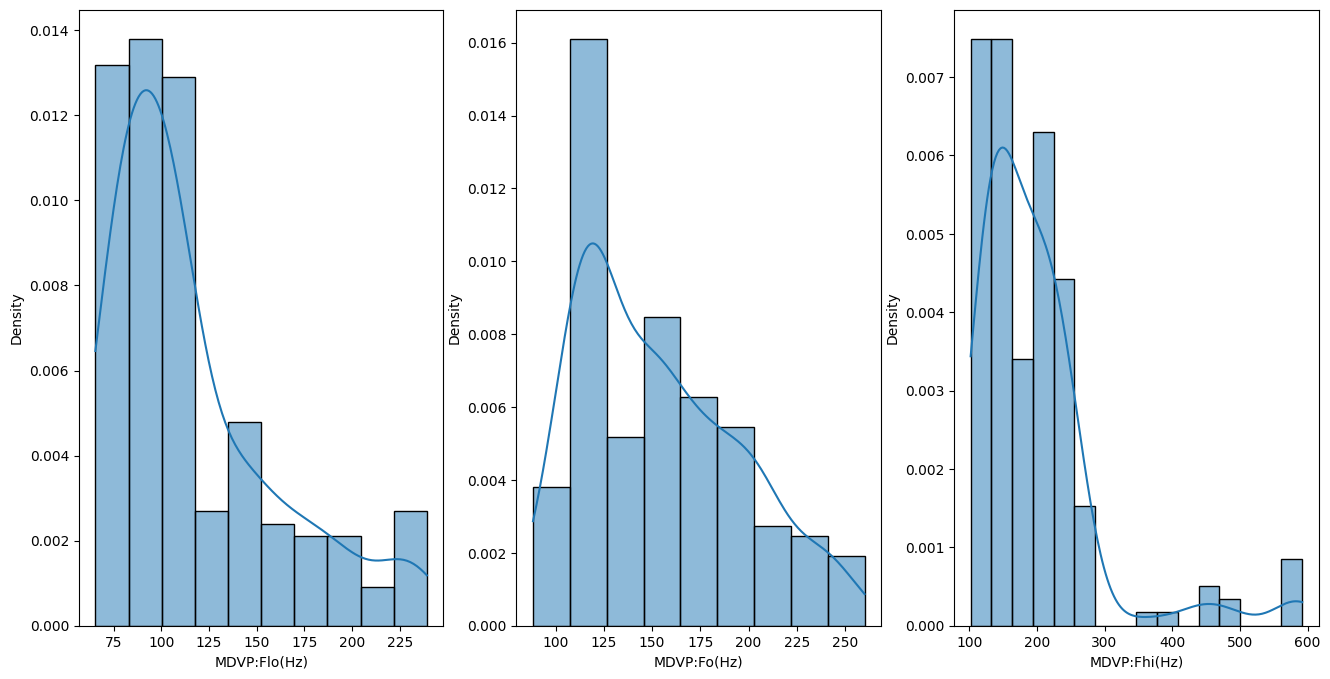

In [25]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.histplot(df['MDVP:Flo(Hz)'],ax=ax[0], kde=True, stat="density") 
sns.histplot(df['MDVP:Fo(Hz)'],ax=ax[1], kde=True, stat="density") 
sns.histplot(df['MDVP:Fhi(Hz)'],ax=ax[2], kde=True, stat="density")
plt.show()

<Axes: xlabel='HNR', ylabel='Density'>

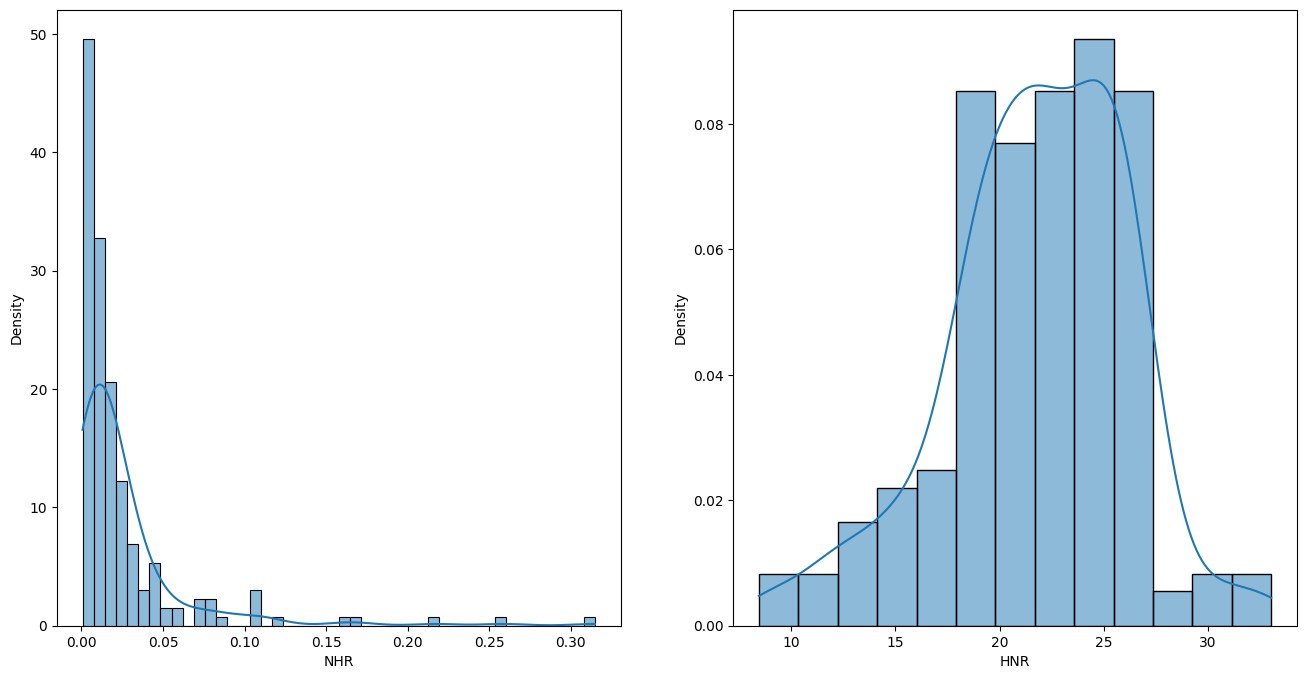

In [26]:
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.histplot(df['NHR'],ax=ax[0], kde=True, stat="density") 
sns.histplot(df['HNR'],ax=ax[1], kde=True, stat="density")

<Axes: xlabel='spread1', ylabel='Density'>

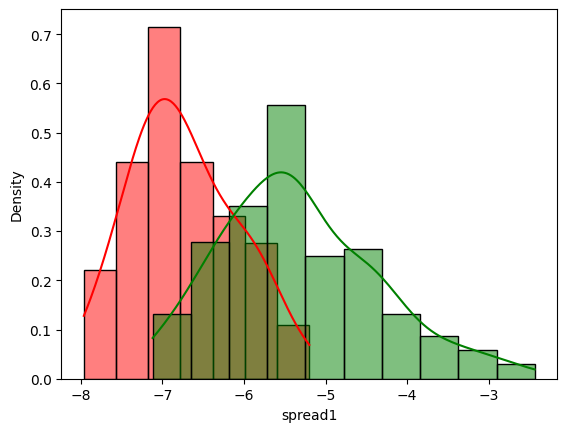

In [27]:
sns.histplot( df[df.status == 0]['spread1'], color = 'r', kde=True, stat= "density")
sns.histplot( df[df.status == 1]['spread1'], color = 'g', kde=True, stat= "density")

<Axes: >

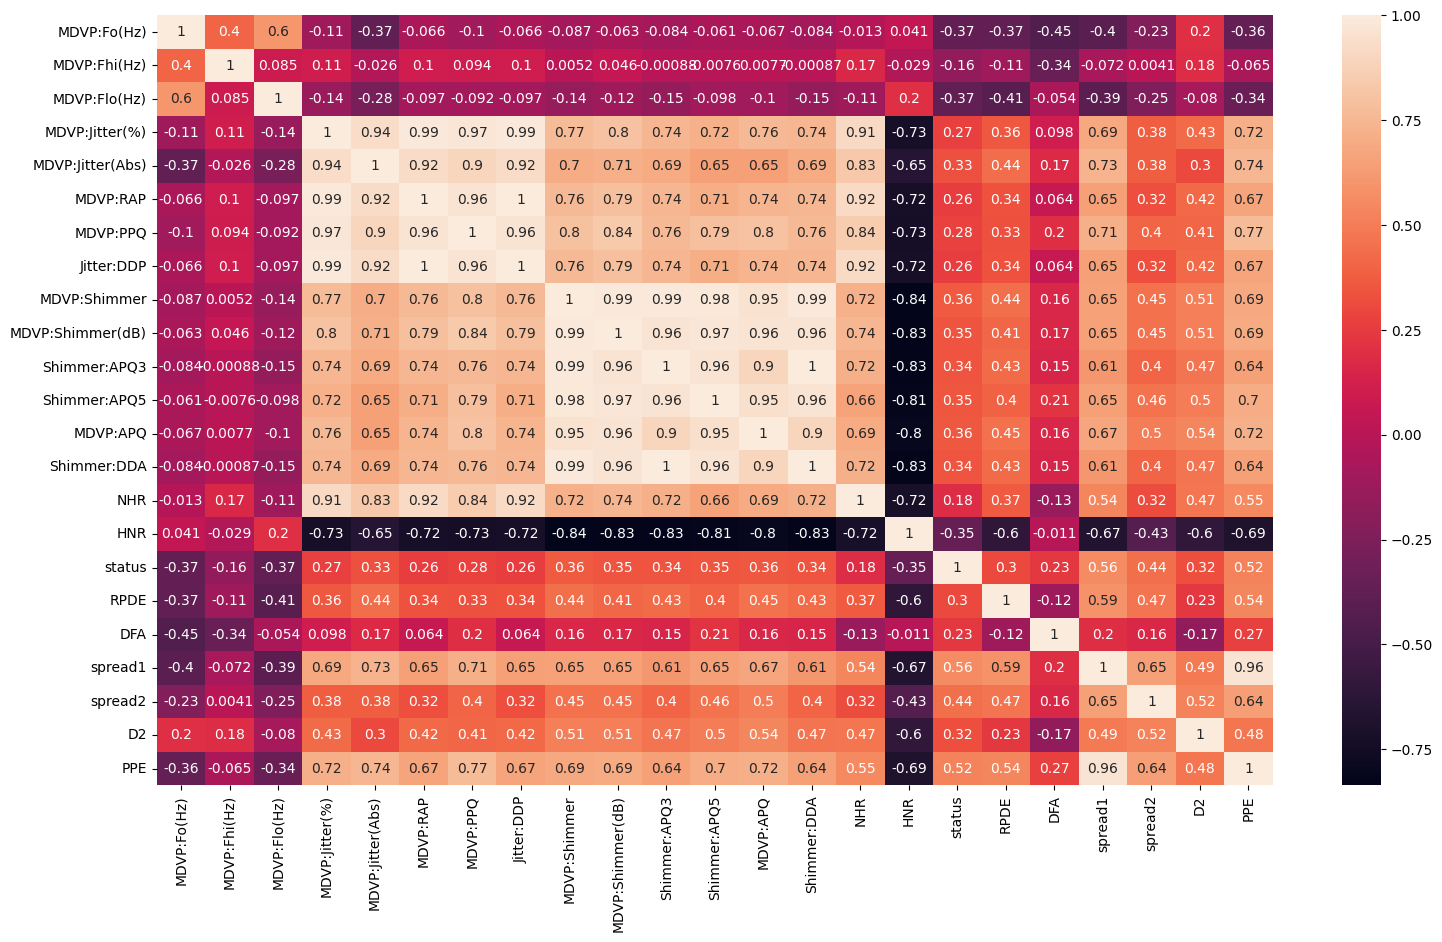

In [28]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot = True)

In [ ]:
#Status has strong relationship with spread1 and PPE

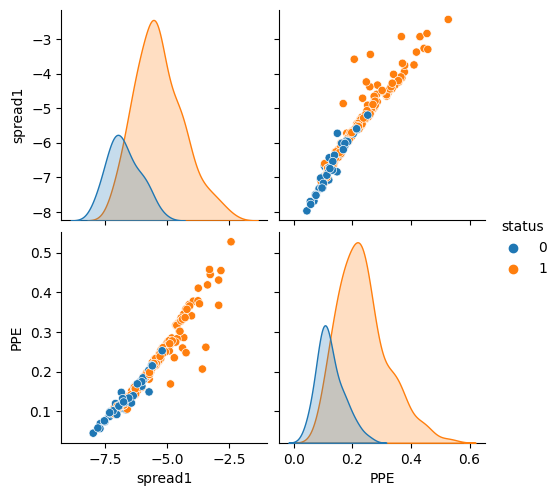

In [132]:
sns.pairplot(df[["spread1", "PPE", "status"]], hue = "status")

# It is highly visble independant varible are linear realationship with dependant variable

In [32]:
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
X = df.drop(['status'],axis=1)
y = df['status']

In [45]:
scaler=StandardScaler()
data=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.2, random_state = 7)

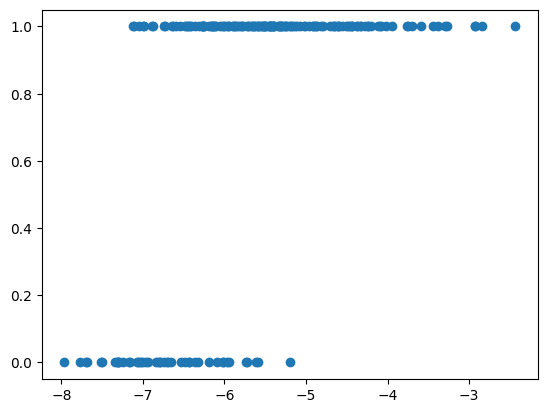

In [40]:
plt.scatter(x = df["spread1"], y=df["status"])
plt.show()

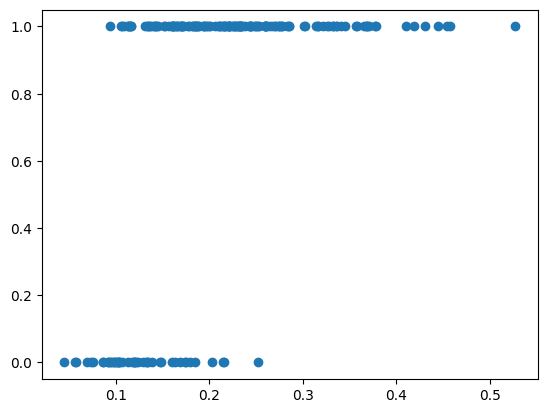

In [41]:
plt.scatter(x = df["PPE"], y=df["status"])
plt.show()

In [42]:
#hope logistc regression works well

from sklearn.linear_model import LogisticRegression

In [49]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
pred = logr.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [51]:
print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred))

Confusion Matrix:
 [[ 7  2]
 [ 1 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.94      0.97      0.95        30

    accuracy                           0.92        39
   macro avg       0.91      0.87      0.89        39
weighted avg       0.92      0.92      0.92        39



# From above Logistic regression provides 92% accuracy for this dataset

# SVM classifier

In [90]:
from sklearn.svm import SVC, SVR
from sklearn import metrics

In [91]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [93]:
svc_pred = clf.predict(X_test)

In [94]:
print("Confusion Matrix:\n",confusion_matrix(y_test,svc_pred))
print("Classification Report:\n",classification_report(y_test,svc_pred))

Confusion Matrix:
 [[ 8  1]
 [ 2 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.97      0.93      0.95        30

    accuracy                           0.92        39
   macro avg       0.88      0.91      0.90        39
weighted avg       0.93      0.92      0.92        39



In [ ]:
#Here we have received 92 percentage accuracy in SVM model

In [95]:
from sklearn.ensemble import RandomForestClassifier


In [101]:
rf=RandomForestClassifier()
model_rf=rf.fit(X_train,y_train)
pred_rf=model_rf.predict(x_test)

In [102]:
print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
print("Classification Report:\n",classification_report(y_test,pred_rf))

Confusion Matrix:
 [[ 8  1]
 [ 0 30]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.97      1.00      0.98        30

    accuracy                           0.97        39
   macro avg       0.98      0.94      0.96        39
weighted avg       0.98      0.97      0.97        39



In [103]:
#Here we have received 97 percentage accuracy in RandomForestClassifier model

In [107]:
#K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
K_cls = KNeighborsClassifier()
K_cls.fit(x_train, y_train)

KNeighborsClassifier()

In [112]:
pred_knn=K_cls.predict(x_test)

In [116]:
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_knn))
print("Classification Report:\n",classification_report(y_test,pred_knn))

Confusion Matrix:
 [[ 9  0]
 [ 1 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.97      0.98        30

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



In [ ]:
#Here we have received 97 percentage accuracy in KNearestNeignbor

In [117]:
#We tried all the best classification algorithm LogisticRegression,,SupportVectorClassifier, RandomForestClassifierand and KNearestNeignbor classifier received
#92%, 92%, 97% and  97% accuracy correspondly


#As the dataset has linar relationship between dependent and independent variable we have chose the algorithm carefully. 
#All the 4 model classified the data with high accuracy.
#Random Forest and KNN classifier received the highest accuracy of 97%